In [58]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score, classification_report

In [59]:
df = pd.read_csv(r"C:\Users\arnip\Downloads\student_performance_prediction.csv")
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


# 🔍What is the distribution of study hours per week and attendance rate?

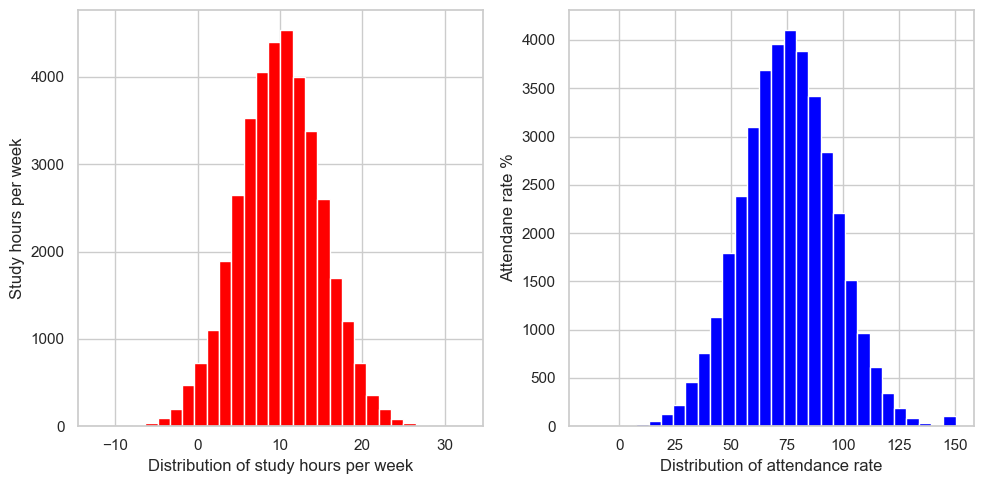

In [62]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.hist(df['Study Hours per Week'],bins = 30 , color='red')
plt.xlabel('Distribution of study hours per week')
plt.ylabel('Study hours per week')

plt.subplot(1, 2, 2)
plt.hist(df['Attendance Rate'],bins = 30 , color='blue')
plt.xlabel('Distribution of attendance rate')
plt.ylabel('Attendane rate %')

plt.tight_layout()
plt.show()

# 📊 How many students passed vs. failed?

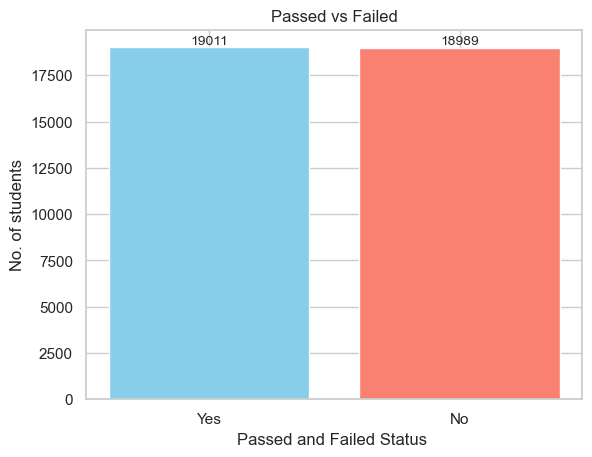

In [63]:
pass_counts = df['Passed'].value_counts()

plt.bar(pass_counts.index, pass_counts.values, color=['skyblue', 'salmon'])
plt.title('Passed vs Failed')
plt.xlabel('Passed and Failed Status ')
plt.ylabel('No. of students')

# See the value upside
for i, val in enumerate(pass_counts.values):
    plt.text(i, val + 10, str(val), ha='center', va='bottom', fontsize=10)

plt.show()

# 🔗  Is there a correlation between study hours, attendance, and previous grades?

Correlation Matrix:
                      Study Hours per Week  Attendance Rate  Previous Grades
Study Hours per Week              1.000000         0.004654         0.000587
Attendance Rate                   0.004654         1.000000        -0.005034
Previous Grades                   0.000587        -0.005034         1.000000


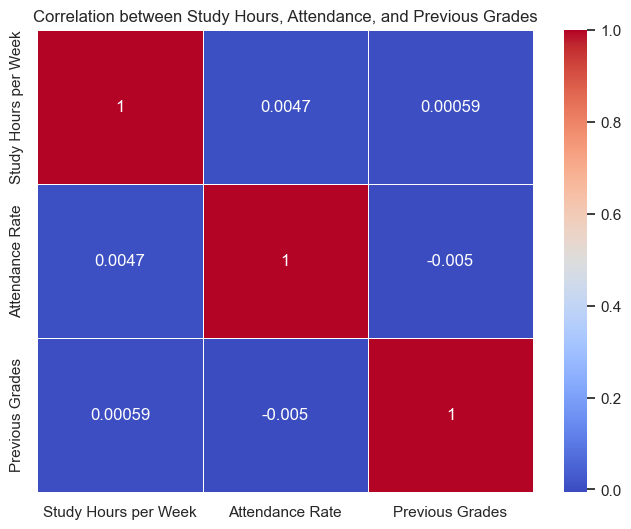

In [64]:
Numeric_df = df.select_dtypes(include=['number'])
correlation_data = Numeric_df.corr()
print("Correlation Matrix:")
print(correlation_data)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_data,annot=True, cmap='coolwarm',linewidths=0.5)
plt.title("Correlation between Study Hours, Attendance, and Previous Grades")
plt.show()

# 🤖 Can we predict whether a student will pass based on input features?

In [66]:
# Read the Data
data = (df)
df = pd.DataFrame(data)

# Train the model
X = df[['Study Hours per Week', 'Attendance Rate', 'Previous Grades']]
y = df['Passed']
model = LogisticRegression()
model.fit(X, y)

# Real-time input
print("Enter the student's data for prediction:")
try:
    study_hours = float(input("Study Hours per Week (e.g. 12): "))
    attendance = float(input("Attendance Rate (e.g. 0.85): "))
    previous_grades = float(input("Previous Grades (e.g. 75): "))

    # Create a DataFrame with the input
    new_data = pd.DataFrame(
        [[study_hours, attendance, previous_grades]],
        columns=['Study Hours per Week', 'Attendance Rate', 'Previous Grades'])

# Prediction model
    prediction = model.predict(new_data)[0]
    probability = model.predict_proba(new_data)[0][1]

    if prediction == 1:
        print(f"\n✅ Predicted: Student is likely to PASS (Confidence: {probability:.1%})")
    else:
        print(f"\n❌ Predicted: Student is likely to FAIL (Confidence: {(1 - probability):.1%})")

except ValueError:
    print("Error: Please enter numeric values only.")


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

 # 🔁 Which ML model performs best: Logistic Regression, Decision Tree, or Random Forest?

In [61]:
# Step 1: Remove rows with missing values and reset index
df_cleaned = df.dropna().copy()

# Step 2: Strip column names (to prevent KeyErrors due to extra spaces)
df_cleaned.columns = df_cleaned.columns.str.strip()

# Step 3: Convert 'Participation in Extracurricular Activities' to binary
df_cleaned.loc[:, 'Participation in Extracurricular Activities'] = df_cleaned['Participation in Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Step 4: Encode other categorical columns safely
df_cleaned.loc[:, 'Parent Education Level'] = LabelEncoder().fit_transform(df_cleaned['Parent Education Level'])
df_cleaned.loc[:, 'Passed'] = LabelEncoder().fit_transform(df_cleaned['Passed'])

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the models
log_model = LogisticRegression()
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42)

log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

# Step 6: Make predictions
log_pred = log_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
forest_pred = forest_model.predict(X_test)

# Step 7: Print results
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))

print("\nDecision Tree Accuracy:", accuracy_score(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

print("\nRandom Forest Accuracy:", accuracy_score(y_test, forest_pred))
print(classification_report(y_test, forest_pred))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# 📏 What is the accuracy, precision, recall, and F1-score of the model?

In [39]:
# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=1)
    rec = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    print(f" {name} Metrics:")
    print(f"Accuracy:  {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall:    {rec:.2f}")
    print(f"F1 Score:  {f1:.2f}")

 Logistic Regression Metrics:
Accuracy:  0.50
Precision: 0.50
Recall:    0.40
F1 Score:  0.44
 Decision Tree Metrics:
Accuracy:  0.51
Precision: 0.51
Recall:    0.50
F1 Score:  0.51
 Random Forest Metrics:
Accuracy:  0.50
Precision: 0.51
Recall:    0.49
F1 Score:  0.50


# 📊  Can we visualize the confusion matrix to interpret the results?

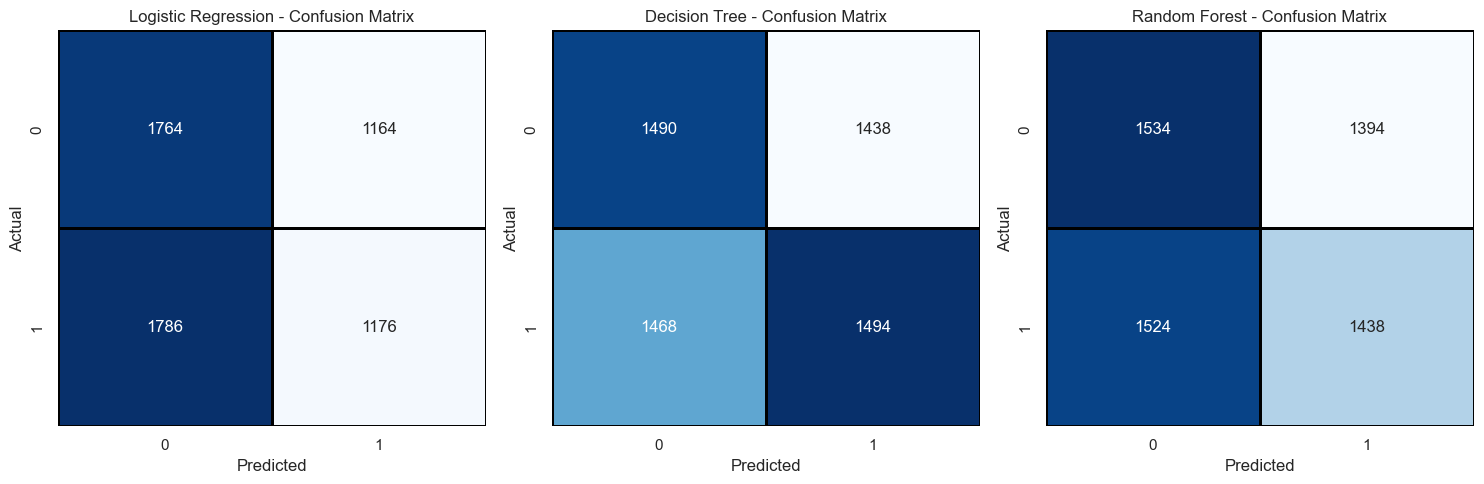

In [45]:
# Plot confusion matrices for each model in one row
def plot_conf_matrix(ax, y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,linecolor='black',linewidth=2)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)

# Create subplots (one row, as many columns as models)
n_models = len(models)
fig, axes = plt.subplots(1, n_models, figsize=(5 * n_models, 5))

# Run and visualize for each model
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    plot_conf_matrix(axes[i], y_test, y_pred, f"{name} - Confusion Matrix")

plt.tight_layout()
plt.show()